# Fixed Effects Estimation (Example I)

### Intro and objectives


### In this lab you will learn:
1. examples of fixed effects estimation
2. how to fit fixed effects models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit fixed effects models
* Worked Examples
* How to interpret the results obtained

In [1]:
!pip install wooldridge
!pip install linearmodels
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.2 MB/s eta 0:00:00


# Example. Effect of Job Training on Firm Scrap Rates

#### We wish to evaluate the effect of a Michigan job training program on worker productivity of manufacturing firms. Let $scrap_{it}$ denote the scrap rate of firm i during year t (the number of items, per 100, that must be scrapped due to defects).

#### Let $grant_{it}$ be a binary indicator equal to one if firm i in year t received a job training grant. We use data for years 87, 88 and 89. A total of 54 firms reported scrap rates each year.

#### No firms received grants prior to 1988. In 1988, 19 firms received grants. In 1989, 10 different firms received grants. Therefore, we must also allow for the possibility that the additional job training in 1988 made workers more productive in 1989. This is easily done by including a lagged value of the grant indicator. We also include year dummies for 1988 and 1989. The model is:




$ scrap_{it}=\beta_0+\delta_0*y88_t+\beta_1*grant_{it}+a_i+u_{it},t=1,2,$


#### where y88t is a dummy variable for 1988 and ai is the unobserved firm effect or the firm fixed effect.
#### The unobserved effect contains such factors as average employee ability, capital, and managerial skill

In [2]:
jtrain = woo.dataWoo('jtrain')

In [3]:
jtrain.head()

,year,fcode,employ,sales,avgsal,scrap,rework,tothrs,union,grant,...,grant_1,clscrap,cgrant,clemploy,clsales,lavgsal,clavgsal,cgrant_1,chrsemp,clhrsemp
0,1987,410032.0,100.0,47000000.0,35000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,10.463103,NaN,NaN,NaN,NaN
1,1988,410032.0,131.0,43000000.0,37000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,0.270027,-0.088949,10.518673,0.055570,0.0,-8.946565,-1.165385
2,1989,410032.0,123.0,49000000.0,39000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,-0.063013,0.130621,10.571317,0.052644,0.0,0.198597,0.047832
3,1987,410440.0,12.0,1560000.0,10500.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,9.259130,NaN,NaN,NaN,NaN
4,1988,410440.0,13.0,1970000.0,11000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,0.080043,0.233347,9.305651,0.046520,0.0,0.000000,0.000000


In [4]:
type(jtrain)

pandas.core.frame.DataFrame

In [5]:
jtrain['entity'] = jtrain['fcode']
jtrain = jtrain.set_index(['fcode', 'year'])

In [6]:
jtrain.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 471 entries, (410032.0, 1987) to (419486.0, 1989)
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   employ    440 non-null    float64
 1   sales     373 non-null    float64
 2   avgsal    406 non-null    float64
 3   scrap     162 non-null    float64
 4   rework    123 non-null    float64
 5   tothrs    415 non-null    float64
 6   union     471 non-null    int64  
 7   grant     471 non-null    int64  
 8   d89       471 non-null    int64  
 9   d88       471 non-null    int64  
 10  totrain   465 non-null    float64
 11  hrsemp    390 non-null    float64
 12  lscrap    162 non-null    float64
 13  lemploy   440 non-null    float64
 14  lsales    373 non-null    float64
 15  lrework   121 non-null    float64
 16  lhrsemp   390 non-null    float64
 17  lscrap_1  108 non-null    float64
 18  grant_1   471 non-null    int64  
 19  clscrap   108 non-null    float64
 20  cgra

In [7]:
jtrain

employ       sales   avgsal  scrap  rework  tothrs  union  \
fcode    year                                                              
410032.0 1987   100.0  47000000.0  35000.0    NaN     NaN    12.0      0   
         1988   131.0  43000000.0  37000.0    NaN     NaN     8.0      0   
         1989   123.0  49000000.0  39000.0    NaN     NaN     8.0      0   
410440.0 1987    12.0   1560000.0  10500.0    NaN     NaN    12.0      0   
         1988    13.0   1970000.0  11000.0    NaN     NaN    12.0      0   
...               ...         ...      ...    ...     ...     ...    ...   
419483.0 1988   108.0  11500000.0  14810.0   25.0     NaN     0.0      1   
         1989   129.0  12000000.0  14227.0   30.0     NaN    20.0      1   
419486.0 1987    80.0   7000000.0  16000.0    NaN     NaN     0.0      0   
         1988    90.0   8500000.0  17000.0    NaN     NaN     0.0      0   
         1989   100.0   9900000.0  18000.0    NaN     NaN    40.0      0   

               grant  d89  d88  ...   clscrap  cgrant  clemploy   clsales  \
fcode    year                   ...                                         
410032.0 1987      0    0    0  ...       NaN       0       NaN       NaN   
         1988      0    0    1  ...       NaN       0  0.270027 -0.088949   
         1989      0    1    0  ...       NaN       0 -0.063013  0.130621   
410440.0 1987      0    0    0  ...       NaN       0       NaN       NaN   
         1988      0    0    1  ...       NaN       0  0.080043  0.233347   
...              ...  ...  ...  ...       ...     ...       ...       ...   
419483.0 1988      0    0    1  ...  0.223144       0 -0.208218  0.044453   
         1989      0    1    0  ...  0.182322       0  0.177681  0.042559   
419486.0 1987      0    0    0  ...       NaN       0       NaN       NaN   
         1988      0    0    1  ...       NaN       0  0.117783  0.194157   
         1989      1    1    0  ...       NaN       1  0.105361  0.152469   

                 lavgsal  clavgsal  cgrant_1    chrsemp  clhrsemp    entity  
fcode    year                                                                
410032.0 1987  10.463103       NaN       NaN        NaN       NaN  410032.0  
         1988  10.518673  0.055570       0.0  -8.946565 -1.165385  410032.0  
         1989  10.571317  0.052644       0.0   0.198597  0.047832  410032.0  
410440.0 1987   9.259130       NaN       NaN        NaN       NaN  410440.0  
         1988   9.305651  0.046520       0.0   0.000000  0.000000  410440.0  
...                  ...       ...       ...        ...       ...       ...  
419483.0 1988   9.603058  0.059321       0.0   0.000000  0.000000  419483.0  
         1989   9.562897 -0.040161       0.0   3.100775  1.411176  419483.0  
419486.0 1987   9.680344       NaN       NaN        NaN       NaN  419486.0  
         1988   9.740969  0.060625       0.0   0.000000  0.000000  419486.0  
         1989   9.798127  0.057158       0.0  36.000000  3.610918  419486.0  

[471 rows x 29 columns]

In [8]:
jtrain[['entity','grant','scrap']].sample(5)

,,entity,grant,scrap
fcode,year,,,
410495.0,1988,410495.0,0,NaN
410567.0,1988,410567.0,0,0.50
418097.0,1988,418097.0,1,1.17
419375.0,1989,419375.0,1,NaN
418051.0,1989,418051.0,0,0.50


In [9]:
# automatic FE model estimation:
reg= plm.PanelOLS.from_formula(formula='lscrap ~ d88 + d89 + grant + grant_1 + EntityEffects', data=jtrain)

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [10]:
# We fit the model
results = reg.fit()


In [11]:
table= pd.DataFrame({'b': round(results.params, 4),
                          'se': round(results.std_errors, 4),
                          't': round(results.tstats, 4),
                          'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

table: 
              b      se       t    pval
d88     -0.0802  0.1095 -0.7327  0.4654
d89     -0.2472  0.1332 -1.8556  0.0663
grant   -0.2523  0.1506 -1.6751  0.0969
grant_1 -0.4216  0.2102 -2.0057  0.0475



## Based on the previous we have computed the coefficients for the following model:

$ log(scrap)=-0.0802*y_{88}-0.2472*y_{89}-0.2523*grant-0.4216*grant_{-1}$



## How do we interpret the equation?

#### Based on the fitted model, we conclude:

####1. The coefficient on y89 indicates that the scrap rate was substantially lower in 1989 than in the base year, 1987, even in the absence of job training grants. There seems to be a "learning effect" irrespective of any job training grant.

#### 2. The coefficient on y88 indicates that the scrap rate was moderately lower in 1988 than in the base year, 1987, even in the absence of job training grants. This effect is not statistically significant however (p-value=0.465).

#####Thus, it is important to allow for these aggregate effects. If we omitted the year dummies, the secular increase in worker productivity would be attributed to the job training grants.


####2. Receiving a job training grant reduced scrap rate by 25% the first year. This effect is statistically significant at a 10% confidence level (p-value=0.096).

#### 3. Receiving a job training grant further reduced scrap rate by 42% the second year. This effect is statistically significant at a 5% confidence level (p-value=0.047)


### We can empirically validate our results

In [12]:
jtrain.sample(4)

,,employ,sales,avgsal,scrap,rework,tothrs,union,grant,d89,d88,...,clscrap,cgrant,clemploy,clsales,lavgsal,clavgsal,cgrant_1,chrsemp,clhrsemp,entity
fcode,year,,,,,,,,,,,,,,,,,,,,,
410596.0,1988,16.0,1166100.0,13520.0,6.0,NaN,12.0,0,0,0,1,...,-0.510826,0,0.693147,0.163311,9.511926,0.080043,0.0,2.0,0.167054,410596.0
410569.0,1988,24.0,NaN,28000.0,NaN,NaN,0.0,0,0,0,1,...,NaN,0,0.182322,NaN,10.239960,0.074108,0.0,0.0,0.000000,410569.0
410517.0,1989,18.0,NaN,11960.0,NaN,NaN,0.0,1,0,1,0,...,NaN,0,-0.105361,NaN,9.389323,-0.017241,0.0,0.0,0.000000,410517.0
410565.0,1988,112.0,21780000.0,20180.0,11.0,NaN,0.0,1,0,0,1,...,-0.646627,0,0.218689,NaN,9.912447,-0.021570,0.0,0.0,0.000000,410565.0


In [13]:
ScrapDataFrame=jtrain.reset_index()[['fcode','year','grant','scrap']]

In [14]:
ScrapDataFrame.groupby('grant')['scrap'].mean()

,scrap
grant,
0,3.999098
1,3.130690


In [15]:
ScrapDataFrame.groupby(['year','grant'])['scrap'].mean()

year  grant
1987  0        4.611667
1988  0        4.191714
      1        3.043684
1989  0        3.094091
      1        3.296000
Name: scrap, dtype: float64

<Axes: xlabel='grant', ylabel='scrap'>

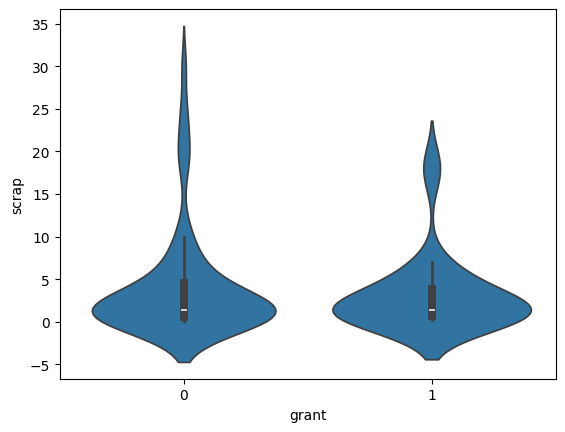

In [16]:
sns.violinplot(data=ScrapDataFrame, x="grant", y="scrap")